# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict whether a tumor is malignant or benign based on various features.

## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📥 Step 1: Load the Dataset

In [12]:
data = pd.read_csv(r"C:\Users\bhagavan naidu\OneDrive\Documents\Cancer_Data.csv")
print("First five rows of dataset:")
print(data.head())
print("\n")


First five rows of dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_w

## 🔍 Step 2: Explore the Dataset

In [13]:
print("=== Exploring the Dataset ===")
print("Shape of the dataset:", data.shape)
print("\nColumns and data types:")
print(data.info())
print("\nStatistical summary:")
print(data.describe())




=== Step 2: Exploring the Dataset ===
Shape of the dataset: (569, 33)

Columns and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null  

In [14]:

# Check for missing values
print("\nMissing values (per column):")
print(data.isnull().sum())
print("\n")



Missing values (per column):
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_d

## 🧹 Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [15]:
# Drop the 'Unnamed: 32' column and 'id'
columns_to_drop = ['Unnamed: 32', 'id']
data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)
print("Dropped columns (if present):", columns_to_drop)

# Check for missing values and provide a summary
missing_values = data.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Dropped columns (if present): ['Unnamed: 32', 'id']

Missing values per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [16]:
# Drop the 'Unnamed: 32' column and 'id'
columns_to_drop = ['Unnamed: 32', 'id']
data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)
print("Dropped columns (if present):", columns_to_drop)

# Check for missing values and provide a summary
missing_values = data.isnull().sum()
print("\nMissing values per column:")
print(missing_values)
# Handling missing values: if any missing values exist, you could drop or fill them.
if data.isnull().values.any():
    # Option 1: Drop rows with missing data
    data.dropna(inplace=True)
    print("Missing values found and rows dropped.")
else:
    print("No missing values found.")
print("\n")


Dropped columns (if present): ['Unnamed: 32', 'id']

Missing values per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
No missi

## 📊 Step 4: Visualize the Data

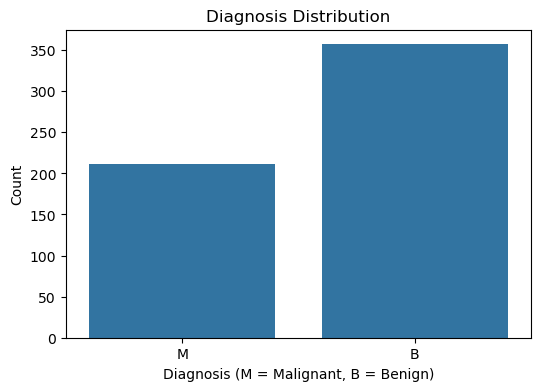

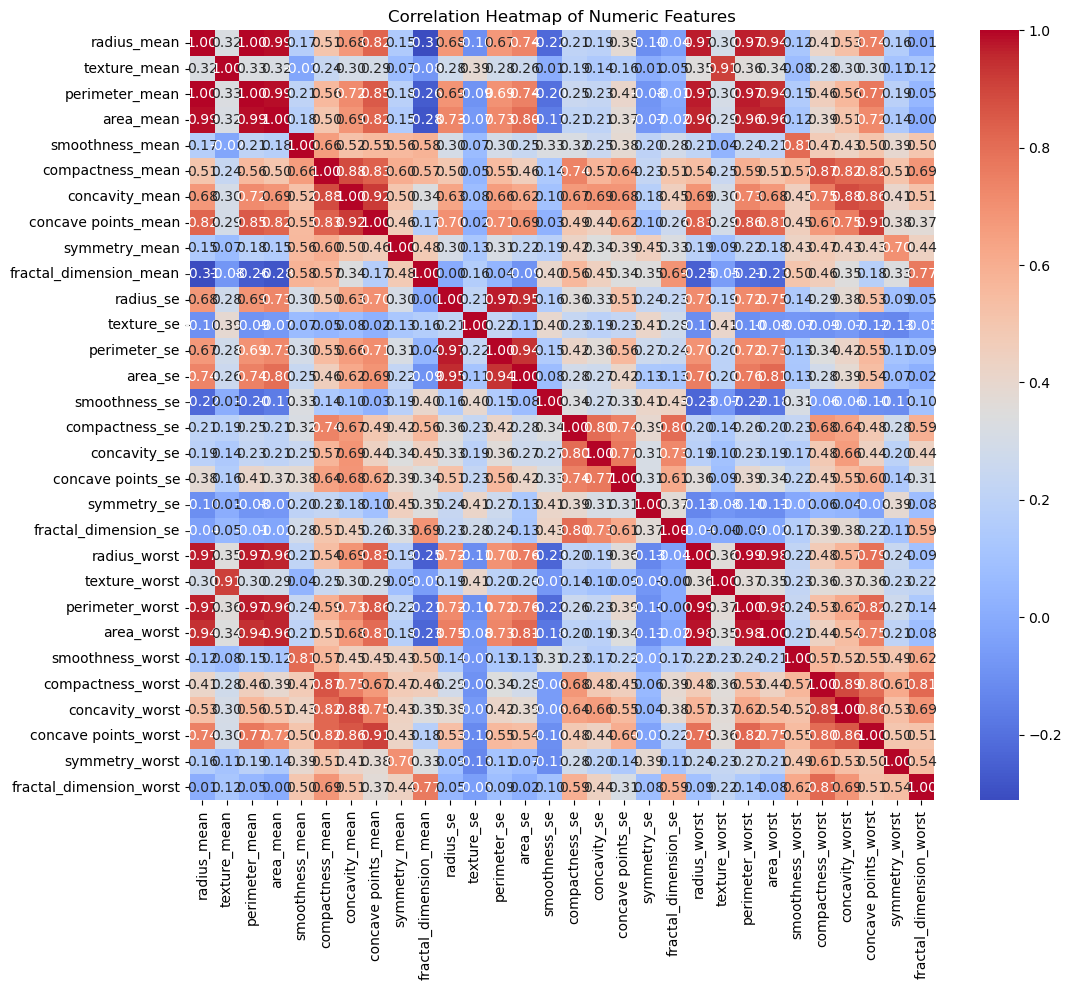

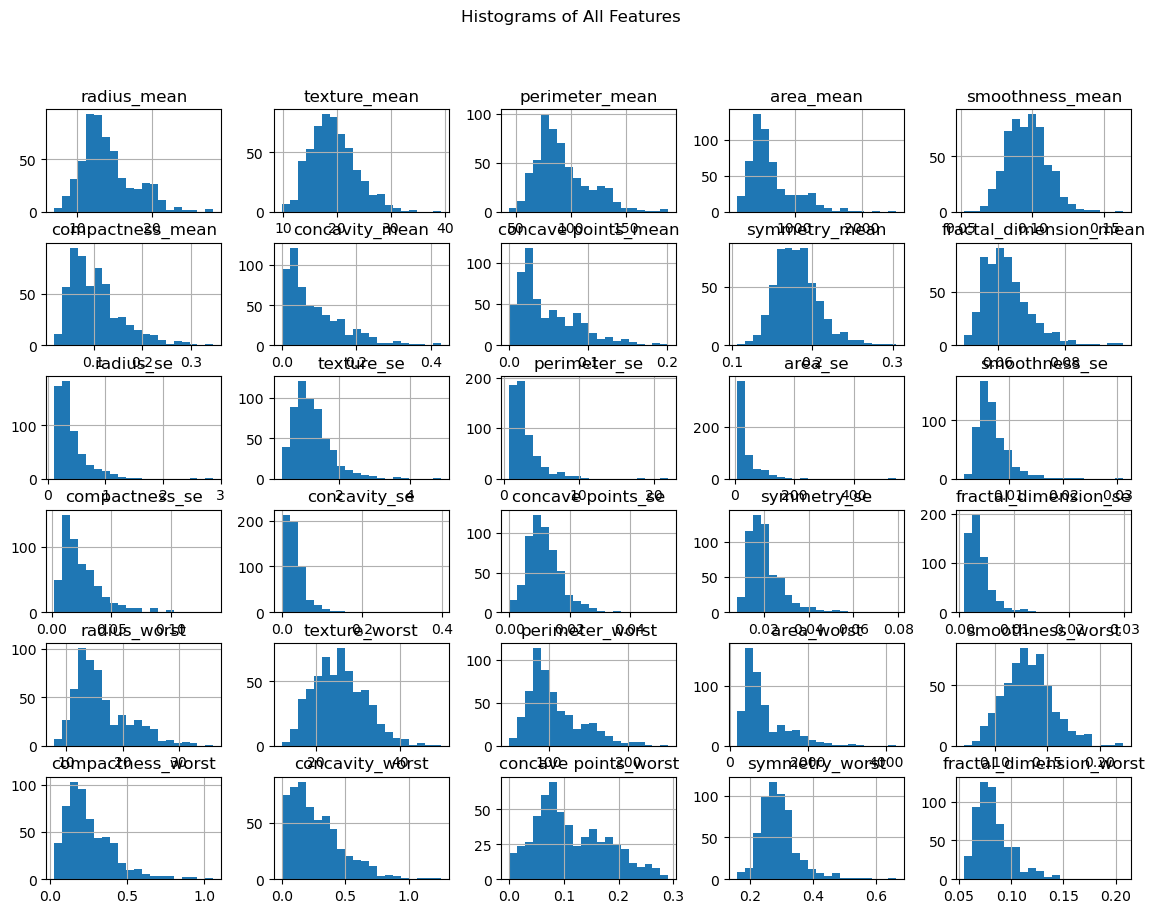

In [18]:
# 1. Visualize the diagnosis distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="diagnosis", data=data)
plt.title("Diagnosis Distribution")
plt.xlabel("Diagnosis (M = Malignant, B = Benign)")
plt.ylabel("Count")
plt.show()

# 2. Correlation Heatmap: Compute correlation only for numeric features.
# We can drop the 'diagnosis' column if it is non-numeric or select numeric columns only.
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# 3. Plot Histograms for a quick look at feature distributions.
data.hist(bins=20, figsize=(14, 10))
plt.suptitle("Histograms of All Features")
plt.show()


## ⚙️ Step 5: Preprocess the Data

In [19]:
# Convert diagnosis column to 0 (benign) and 1 (malignant)
# Map "M" to 1 (malignant) and "B" to 0 (benign)
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})


# Split features and labels
# Separate features (X) and target label (y)
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Scale the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing completed.")
print("\n")



Preprocessing completed.




## 🤖 Step 6: Train a Machine Learning Model

In [20]:
# Use Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

## 🧪 Step 7: Evaluate the Model

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict the labels for the test set
y_pred = logreg.predict(X_test_scaled)

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display the classification report (includes precision, recall and f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.96

Confusion Matrix:
[[71  1]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## ✅ Conclusion

Awesome work! 🎉

You've successfully built a breast cancer prediction model using Logistic Regression. You explored the data, cleaned it, visualized it, trained a model, and evaluated its performance.

### 🚀 Next Steps
- Try different models like RandomForest or SVM
- Perform feature selection
- Tune hyperparameters for better accuracy